<a href="https://colab.research.google.com/github/SophiaKim100/NDSRP/blob/main/Olympic_Events.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Do Physical Traits Predict Olympic Medal Success?**
Can height, weight, and age be used to predict whether an Olympic athlete will win a medal?

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import metrics
from sklearn.preprocessing import *
from sklearn.model_selection import cross_val_score


In [89]:
df = pd.read_csv('/content/athlete_events.csv')
df.drop(['ID', 'Name', 'Sex', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Event'], axis = 1, inplace = True)
df['Medal'] = df['Medal'].fillna('None') #replace missing medal values
df.drop_duplicates(inplace = True)
df.dropna(subset=['Age', 'Height', 'Weight', 'Sport'], inplace=True)
df.head()

,Age,Height,Weight,Sport,Medal
0,24.0,180.0,80.0,Basketball,None
1,23.0,170.0,60.0,Judo,None
4,21.0,185.0,82.0,Speed Skating,None
6,25.0,185.0,82.0,Speed Skating,None
8,27.0,185.0,82.0,Speed Skating,None


# **Group By Sports and Describe Each individual Trait**

In [90]:
grouped_height = df.groupby('Sport')[['Height']].describe()
grouped_height

Height                                       \
                             count        mean        std    min    25%   
Sport                                                                     
Alpine Skiing               2674.0  173.665295   8.116516  142.0  168.0   
Archery                     1337.0  173.197457   8.460098  152.0  167.0   
Art Competitions              15.0  173.666667   9.115659  150.0  171.0   
Athletics                  15673.0  177.083711  10.617395  142.0  170.0   
Badminton                   1100.0  174.330000   8.580678  150.0  168.0   
Baseball                     823.0  182.565006   6.826515  147.0  178.0   
Basketball                  3305.0  191.316793  11.789381  161.0  183.0   
Beach Volleyball             525.0  186.266667   9.429597  163.0  180.0   
Biathlon                    1853.0  174.261738   8.435246  150.0  168.0   
Bobsleigh                   1605.0  181.533956   6.881134  155.0  178.0   
Boxing                      3128.0  173.382033  10.145921  127.0  166.0   
Canoeing                    3859.0  178.399845   8.578459  151.0  172.0   
Cross Country Skiing        2849.0  173.469287   8.521403  150.0  167.0   
Curling                      408.0  174.122549   8.610586  153.0  168.0   
Cycling                     4774.0  176.188940   8.285569  136.0  170.0   
Diving                      1482.0  166.568151   7.955040  137.0  160.0   
Equestrianism               2852.0  174.486325   7.790137  148.0  170.0   
Fencing                     3995.0  177.228035   8.860930  152.0  171.0   
Figure Skating              1361.0  168.272594  10.087772  137.0  160.0   
Football                    3409.0  175.171898   8.425023  140.0  170.0   
Freestyle Skiing             863.0  170.933951   8.605240  149.0  165.0   
Golf                         108.0  174.046296   8.544971  157.0  168.0   
Gymnastics                  3158.0  161.724509   8.687813  127.0  156.0   
Handball                    3030.0  183.444884   9.818093  153.0  176.0   
Hockey                      3597.0  173.469002   8.640963  138.0  167.0   
Ice Hockey                  3884.0  178.748970   8.201497  150.0  173.0   
Judo                        2797.0  174.327494  10.712861  143.0  167.0   
Lacrosse                       2.0  174.000000   8.485281  168.0  171.0   
Luge                        1158.0  176.543178   7.714960  153.0  171.0   
Modern Pentathlon            871.0  177.882893   6.968571  155.0  173.0   
Motorboating                   1.0  181.000000        NaN  181.0  181.0   
Nordic Combined              670.0  176.376119   6.088684  160.0  172.0   
Rhythmic Gymnastics          544.0  167.777574   5.580829  142.0  164.0   
Rowing                      6060.0  183.894059  10.518023  132.0  178.0   
Rugby                         29.0  173.965517   5.628263  164.0  170.0   
Rugby Sevens                 293.0  175.358362  10.213705  153.0  168.0   
Sailing                     4285.0  178.338856   8.363586  150.0  172.0   
Shooting                    5042.0  173.642007   8.360443  146.0  168.0   
Short Track Speed Skating    827.0  170.204353   7.758028  150.0  165.0   
Skeleton                     174.0  176.224138   8.895104  157.0  170.0   
Ski Jumping                  993.0  176.099698   6.917802  152.0  172.0   
Snowboarding                 805.0  172.966460   8.674611  150.0  166.0   
Softball                     432.0  169.451389   6.691925  150.0  165.0   
Speed Skating               2062.0  174.437924   8.986797  149.0  167.0   
Swimming                    7444.0  179.064213  10.542514  138.0  171.0   
Synchronized Swimming        639.0  168.339593   5.170344  153.0  165.0   
Table Tennis                1201.0  171.462115   9.247366  145.0  165.0   
Taekwondo                    568.0  176.936620  10.074477  150.0  170.0   
Tennis                      1351.0  179.175426   9.243593  150.0  172.0   
Trampolining                 149.0  166.563758   7.055113  154.0  162.0   
Triathlon                    505.0  173.704950   8.89

In [91]:
grouped_weight = df.groupby('Sport')[['Weight']].describe()
grouped_weight

Weight                                           \
                             count       mean        std   min    25%   50%   
Sport                                                                         
Alpine Skiing               2674.0  72.385565  11.649008  45.0  63.00  72.0   
Archery                     1337.0  70.055722  13.134769  42.0  60.00  69.0   
Art Competitions              15.0  77.266667  10.271087  59.0  71.00  77.0   
Athletics                  15673.0  72.204141  18.863179  35.0  59.00  69.0   
Badminton                   1100.0  68.314545   9.389202  43.0  61.00  68.0   
Baseball                     823.0  85.721142   9.734508  38.0  79.00  85.0   
Basketball                  3305.0  85.960666  15.240996  50.0  75.00  85.0   
Beach Volleyball             525.0  79.190476  12.287814  55.0  68.00  79.0   
Biathlon                    1853.0  67.043713   9.488198  45.0  59.00  68.0   
Bobsleigh                   1605.0  88.917445  11.024353  55.0  82.00  90.0   
Boxing                      3128.0  66.562340  13.999981  46.0  55.75  64.0   
Canoeing                    3859.0  76.171547  10.306518  48.0  69.00  76.0   
Cross Country Skiing        2849.0  66.272201   9.451739  42.0  58.00  66.0   
Curling                      408.0  72.061275  12.259226  45.0  62.00  72.0   
Cycling                     4774.0  70.079179   9.848018  45.0  64.00  70.0   
Diving                      1482.0  60.451080   9.410358  28.0  53.00  60.0   
Equestrianism               2852.0  67.823107   8.723369  43.0  62.00  68.0   
Fencing                     3995.0  71.269712  10.446607  44.0  63.00  72.0   
Figure Skating              1361.0  59.764879  11.801694  32.0  50.00  58.0   
Football                    3409.0  70.178498   9.039853  28.0  64.00  70.0   
Freestyle Skiing             863.0  67.059676  11.276563  43.0  59.00  65.0   
Golf                         108.0  71.194444  11.643022  48.0  63.00  70.0   
Gymnastics                  3158.0  55.547973  10.222330  25.0  48.00  56.0   
Handball                    3030.0  81.504620  13.483118  48.0  70.00  82.0   
Hockey                      3597.0  69.320545   9.827197  45.0  62.00  69.0   
Ice Hockey                  3884.0  80.629763  11.277527  47.0  73.00  82.0   
Judo                        2797.0  79.758312  22.317709  46.0  63.00  75.0   
Lacrosse                       2.0  66.500000   9.192388  60.0  63.25  66.5   
Luge                        1158.0  77.117444  10.548977  48.0  69.00  77.0   
Modern Pentathlon            871.0  69.803674   7.843544  42.0  65.00  70.0   
Motorboating                   1.0  77.000000        NaN  77.0  77.00  77.0   
Nordic Combined              670.0  67.470149   6.053746  53.0  63.00  67.0   
Rhythmic Gymnastics          544.0  48.704044   5.352638  30.0  45.00  49.0   
Rowing                      6060.0  79.649092  13.883671  38.0  72.00  81.0   
Rugby                         29.0  77.827586   8.623344  68.0  72.00  76.0   
Rugby Sevens                 293.0  78.972696  14.713914  53.0  66.00  77.0   
Sailing                     4285.0  76.326954  13.007279  48.0  67.00  75.0   
Shooting                    5042.0  74.588259  13.713926  40.0  65.00  74.0   
Short Track Speed Skating    827.0  64.481258   9.092507  43.0  58.00  63.0   
Skeleton                     174.0  74.166667  12.390134  51.0  62.00  76.0   
Ski Jumping                  993.0  65.232125   6.858760  43.0  60.00  65.0   
Snowboarding                 805.0  69.366460  11.563952  43.0  60.00  68.0   
Softball                     432.0  67.509259   9.499049  45.0  61.00  66.0   
Speed Skating               2062.0  70.518429  10.250035  46.0  62.00  70.0   
Swimming                    7444.0  71.341416  11.956129  39.0  62.00  71.0   
Synchronized Swimming        639.0  55.748044   5.027578  39.0  53.00  55.0   
Table Tennis                1201.0  65.245629  10.150227  42.0  58.00  64.0   
Taekwondo                    568.0  68.426937  13.625452  46.0  57.00  67.0   

In [92]:
grouped_age = df.groupby('Sport')[['Age']].describe()
grouped_age

Age                                          \
                             count       mean        std   min   25%   50%   
Sport                                                                        
Alpine Skiing               2674.0  23.728497   4.215788  14.0  21.0  23.0   
Archery                     1337.0  26.543755   6.823024  14.0  21.0  25.0   
Art Competitions              15.0  42.666667  12.909944  22.0  36.0  44.0   
Athletics                  15673.0  25.971735   5.029497  12.0  22.0  25.0   
Badminton                   1100.0  25.858182   3.920024  16.0  23.0  26.0   
Baseball                     823.0  26.347509   4.559503  18.0  23.0  26.0   
Basketball                  3305.0  25.514372   3.985885  16.0  22.0  25.0   
Beach Volleyball             525.0  29.192381   4.191861  18.0  26.0  29.0   
Biathlon                    1853.0  26.568807   4.336325  17.0  23.0  26.0   
Bobsleigh                   1605.0  28.664798   4.992117  18.0  25.0  28.0   
Boxing                      3128.0  23.559463   3.624568  15.0  21.0  23.0   
Canoeing                    3859.0  25.570873   4.637378  15.0  22.0  25.0   
Cross Country Skiing        2849.0  26.431028   4.590488  15.0  23.0  26.0   
Curling                      408.0  31.154412   6.813282  17.0  26.0  30.0   
Cycling                     4774.0  25.419564   4.729795  16.0  22.0  25.0   
Diving                      1482.0  22.271930   4.228406  13.0  19.0  22.0   
Equestrianism               2852.0  34.470898   8.803888  16.0  28.0  33.0   
Fencing                     3995.0  27.037797   5.462791  14.0  23.0  26.0   
Figure Skating              1361.0  22.236591   4.489188  11.0  19.0  22.0   
Football                    3409.0  23.917571   3.741573  15.0  21.0  23.0   
Freestyle Skiing             863.0  24.477404   4.686124  13.0  21.0  24.0   
Golf                         108.0  29.583333   7.186598  18.0  24.0  28.5   
Gymnastics                  3158.0  21.649145   4.561106  13.0  18.0  21.0   
Handball                    3030.0  26.522772   4.231886  17.0  23.0  26.0   
Hockey                      3597.0  25.735335   4.055854  15.0  23.0  25.0   
Ice Hockey                  3884.0  25.884655   4.552222  15.0  22.0  25.0   
Judo                        2797.0  25.478727   4.062635  14.0  23.0  25.0   
Lacrosse                       2.0  28.000000   1.414214  27.0  27.5  28.0   
Luge                        1158.0  24.756477   5.020384  16.0  21.0  24.0   
Modern Pentathlon            871.0  26.251435   4.190566  15.0  23.0  26.0   
Motorboating                   1.0  27.000000        NaN  27.0  27.0  27.0   
Nordic Combined              670.0  24.076119   3.821331  15.0  22.0  24.0   
Rhythmic Gymnastics          544.0  18.829044   2.595896  13.0  17.0  19.0   
Rowing                      6060.0  25.645545   4.630293  12.0  22.0  25.0   
Rugby                         29.0  24.137931   3.324413  20.0  22.0  23.0   
Rugby Sevens                 293.0  26.119454   3.762112  18.0  23.0  26.0   
Sailing                     4285.0  29.681214   7.394047  15.0  24.0  28.0   
Shooting                    5042.0  32.290163   8.450147  15.0  26.0  32.0   
Short Track Speed Skating    827.0  22.752116   3.908175  13.0  20.0  23.0   
Skeleton                     174.0  29.028736   5.399024  18.0  25.0  29.0   
Ski Jumping                  993.0  23.308157   4.061734  14.0  20.0  23.0   
Snowboarding                 805.0  24.755280   4.629130  14.0  21.0  24.0   
Softball                     432.0  26.231481   4.278813  17.0  23.0  26.0   
Speed Skating               2062.0  24.411736   4.299184  13.0  21.0  24.0   
Swimming                    7444.0  21.054272   4.065071  11.0  18.0  21.0   
Synchronized Swimming        639.0  22.646322   3.464117  15.0  20.0  22.0   
Table Tennis                1201.0  26.664446   5.894331  15.0  22.0  26.0   
Taekwondo                    568.0  24.117958   4.111990  16.0  21.0  24.0   
Tennis                      1351.0  25.289415   4.565

# **Visualizations**

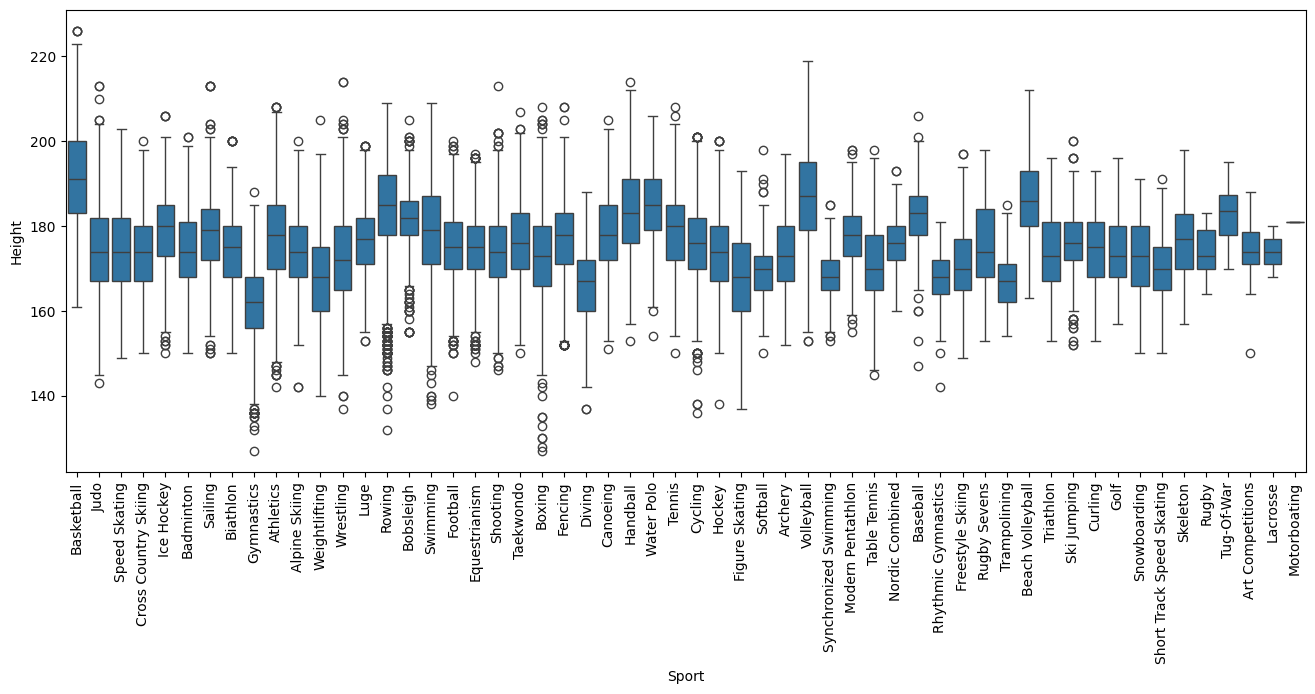

In [93]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Sport', y='Height', data=df)
plt.xticks(rotation=90)
plt.show()

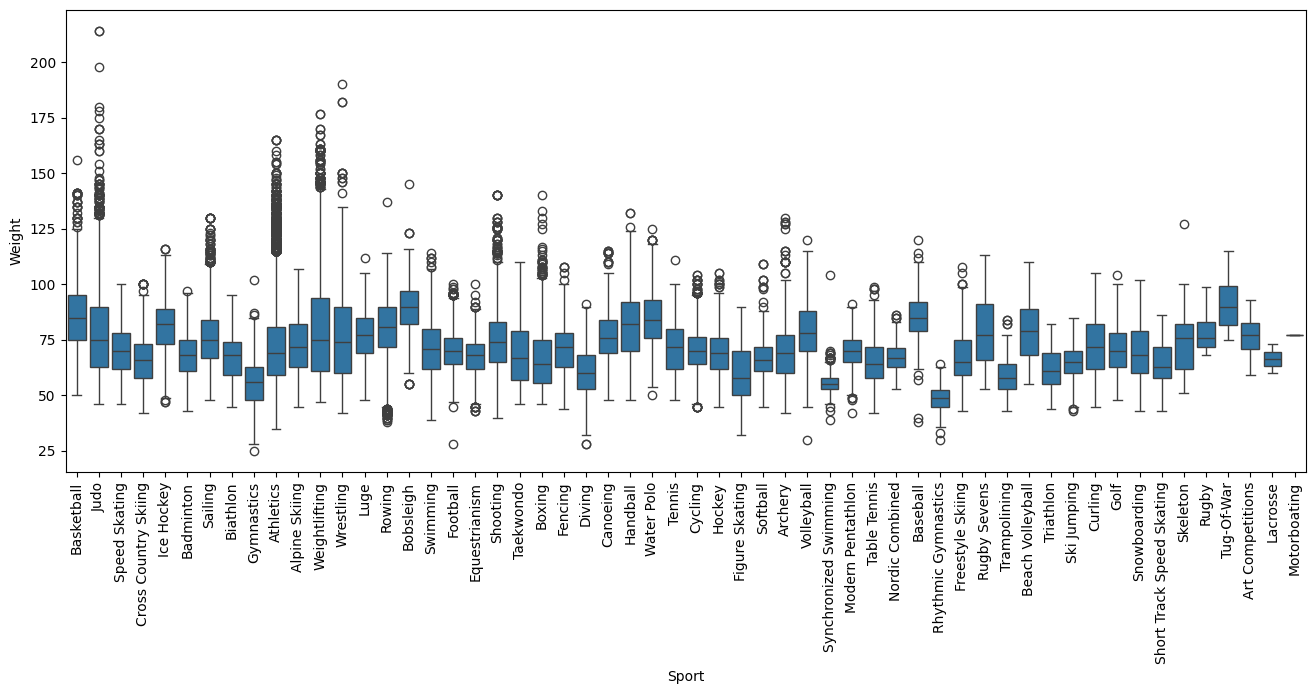

In [94]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Sport', y='Weight', data=df)
plt.xticks(rotation=90)
plt.show()

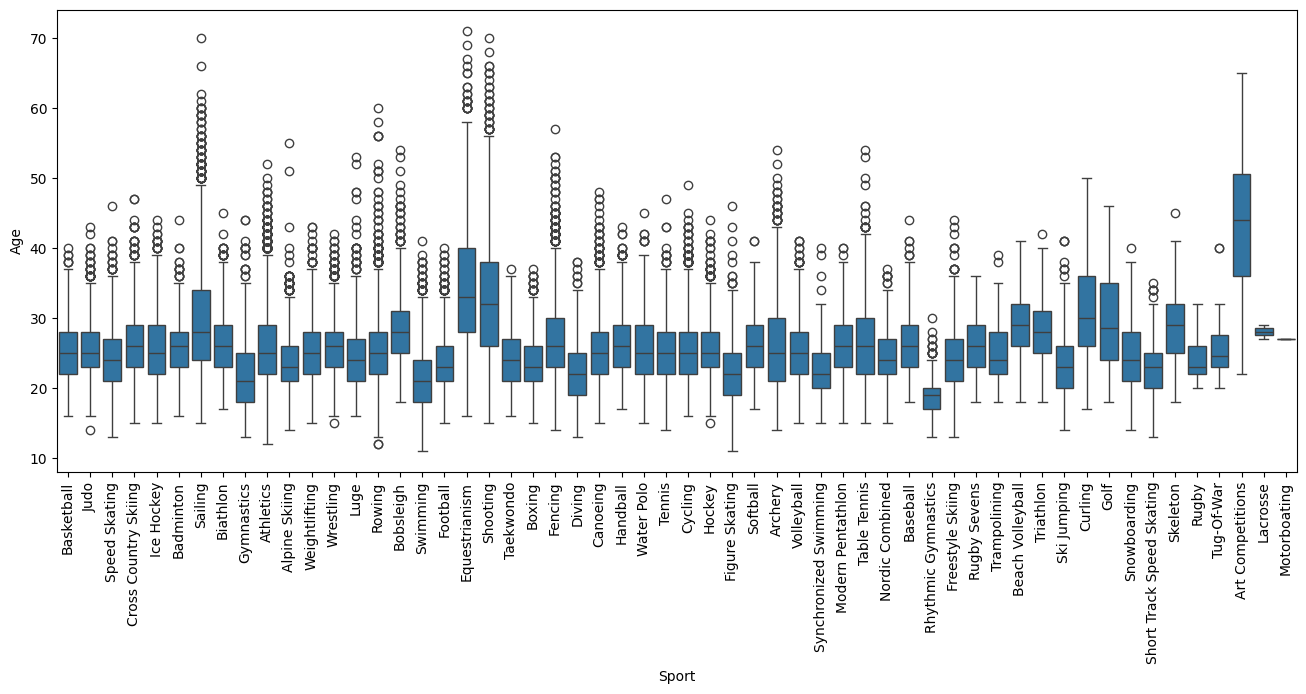

In [95]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Sport', y='Age', data=df)
plt.xticks(rotation=90)
plt.show()

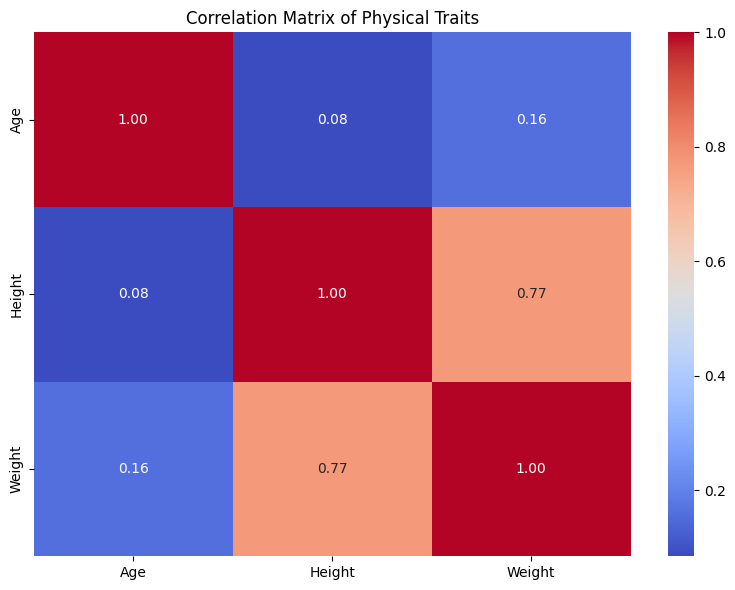

In [96]:
corr_matrix = df[['Age', 'Height', 'Weight']].corr()
plt.figure(figsize=(8, 6))  # adjust size to prevent squishing
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Physical Traits")
plt.tight_layout()
plt.show()

# **Encode & Feature Prep**

In [105]:
features = df[['Height', 'Age', 'Weight']]
label = df['Medal']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state = 42)

In [107]:
#create a standardized version of the training and testing data
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [110]:
#create a normalized version of the training and testing data
norm_scaler = MinMaxScaler()
X_train_norm = norm_scaler.fit_transform(X_train)
X_test_norm = norm_scaler.transform(X_test)

In [111]:
#test on unscaled training data
model_unscaled = KNeighborsClassifier(n_neighbors=5)
model_unscaled.fit(X_train, y_train)
pred_unscaled = model_unscaled.predict(X_test)
print(accuracy_score(y_test, pred_unscaled))

0.7396719443200781


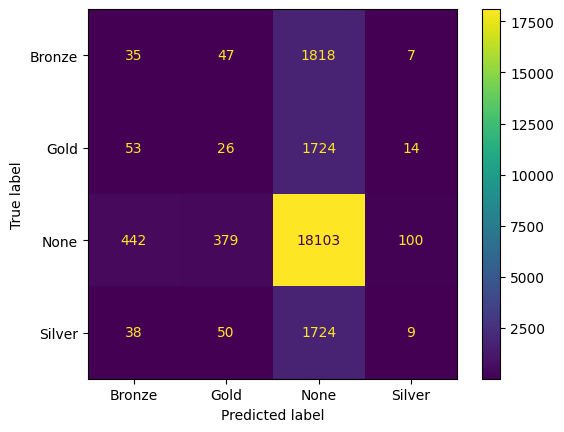

In [113]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_unscaled, display_labels = model_unscaled.classes_)
plt.show()

In [114]:
#Test on standardized training data
model_std = KNeighborsClassifier(n_neighbors=5)
model_std.fit(X_train_std, y_train)
pred_std =  model_std.predict(X_test_std)
print(accuracy_score(y_test, pred_std))

0.7403231714762506


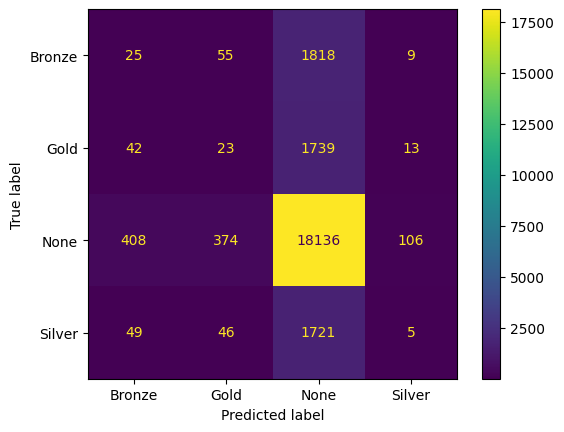

In [115]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_std, display_labels = model_std.classes_)
plt.show()

In [116]:
#Test on normalized data
model_norm = KNeighborsClassifier(n_neighbors=5)
model_norm.fit(X_train_norm, y_train)
pred_norm = model_norm.predict(X_test_norm)
print(accuracy_score(y_test, pred_norm))

0.7391835239529488


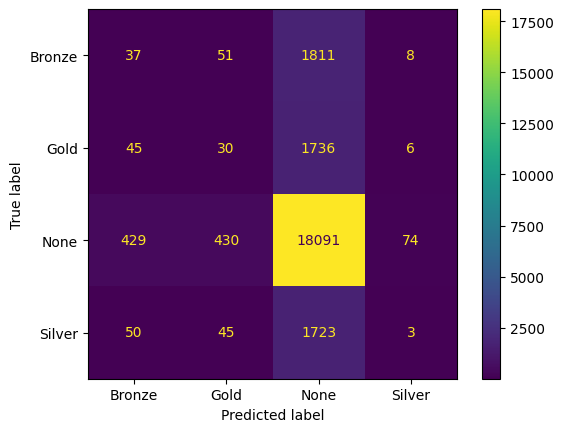

In [117]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_norm, display_labels = model_norm.classes_)
plt.show()